## Importing Libraries

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix

## Data Preprocessing

### Training Image Preprocessing

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf # Importing the TensorFlow library as tf
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Mounted at /content/drive
Found 10151 files belonging to 5 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2123 files belonging to 5 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 40.25  33.75  14.25]
   [ 44.    40.25  16.5 ]
   [ 42.    42.    11.  ]
   ...
   [ 37.    71.    36.  ]
   [ 42.5   76.5   41.5 ]
   [ 33.5   67.5   32.5 ]]

  [[ 46.    45.25  16.25]
   [ 47.5   49.5   16.5 ]
   [ 86.75  91.5   53.  ]
   ...
   [ 35.5   69.5   34.5 ]
   [ 41.    75.    40.  ]
   [ 36.75  70.75  35.75]]

  [[ 91.   100.25  57.  ]
   [136.75 146.75 101.75]
   [154.75 168.5  119.25]
   ...
   [ 32.    66.    31.  ]
   [ 37.25  71.25  36.25]
   [ 35.    69.    34.  ]]

  ...

  [[160.5  175.5  144.  ]
   [145.25 160.5  127.25]
   [171.75 187.5  152.25]
   ...
   [ 98.75 135.75  57.75]
   [ 95.5  132.5   54.5 ]
   [110.25 147.25  69.25]]

  [[151.25 166.25 137.25]
   [179.5  194.5  165.  ]
   [188.25 203.5  170.25]
   ...
   [ 97.25 134.25  56.25]
   [ 97.5  134.5   56.5 ]
   [111.25 148.25  70.25]]

  [[171.25 185.25 159.25]
   [173.   188.   159.  ]
   [155.   170.   138.  ]
   ...
   [102.75 139.75  61.75]
   [105.75 142.75  64.75]
   [108.   145.    6

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [ ]:
## Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1000,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output Layer
model.add(Dense(units=5,activation='softmax'))


### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       2,049,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           5,005 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,766,229 (25.81 MB)

 Trainable params: 6,766,229 (25.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = model.fit(x=training_set,epochs=10,validation_data=validation_set)

Epoch 1/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1669s 5s/step - accuracy: 0.5899 - loss: 1.0147 - val_accuracy: 0.8672 - val_loss: 0.3428
Epoch 2/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1380s 4s/step - accuracy: 0.9066 - loss: 0.2622 - val_accuracy: 0.8917 - val_loss: 0.3335
Epoch 3/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1408s 4s/step - accuracy: 0.9468 - loss: 0.1570 - val_accuracy: 0.9044 - val_loss: 0.2795
Epoch 4/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1324s 4s/step - accuracy: 0.9565 - loss: 0.1293 - val_accuracy: 0.9293 - val_loss: 0.2938
Epoch 5/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1335s 4s/step - accuracy: 0.9641 - loss: 0.1009 - val_accuracy: 0.9312 - val_loss: 0.2412
Epoch 6/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 1331s 4s/step - accuracy: 0.9699 - loss: 0.0900 - val_accuracy: 0.7993 - val_loss: 0.6936
Epoch 7/10
142/318 ━━━━━━━━━━━━━━━━━━━━ 11:25 4s/step - accuracy: 0.9502 - loss: 0.1304

## Model Evaluation

In [ ]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

311/311 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.9864 - loss: 0.0463


In [ ]:
print(train_loss,train_acc)

0.03677801042795181 0.9880281686782837


In [ ]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9537 - loss: 0.1473


In [ ]:
print(val_loss,val_acc)

0.16692858934402466 0.9518862962722778


### Saving Model

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved models/traine_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.796177089214325,
  0.9360160827636719,
  0.953822910785675,
  0.9639838933944702,
  0.9684104919433594,
  0.9700201153755188,
  0.9606639742851257,
  0.9806841015815735,
  0.9828974008560181,
  0.9814889430999756,
  0.9845070242881775,
  0.9866197109222412,
  0.9906438589096069,
  0.9874245524406433,
  0.9921529293060303,
  0.9903420805931091,
  0.9931589365005493,
  0.9888330101966858,
  0.9940643906593323,
  0.9938631653785706],
 'loss': [0.5173066258430481,
  0.18711024522781372,
  0.13188476860523224,
  0.10861998051404953,
  0.09135052561759949,
  0.0854855328798294,
  0.11623978614807129,
  0.056971050798892975,
  0.04977165162563324,
  0.04993464797735214,
  0.04245295003056526,
  0.03951206058263779,
  0.027514973655343056,
  0.035787083208560944,
  0.021917056292295456,
  0.027405306696891785,
  0.018068592995405197,
  0.03598443791270256,
  0.017062373459339142,
  0.021479401737451553],
 'val_accuracy': [0.9229086637496948,
  0.9420448541641235,
  0.9256424307

In [ ]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

[0.9229086637496948,
 0.9420448541641235,
 0.9256424307823181,
 0.956807017326355,
 0.9524330496788025,
 0.9475123286247253,
 0.9611809849739075,
 0.9644614458084106,
 0.96555495262146,
 0.9677419066429138,
 0.9513395428657532,
 0.9677419066429138,
 0.9633679389953613,
 0.9589939713478088,
 0.9650081992149353,
 0.955166757106781,
 0.9540732502937317,
 0.9584472179412842,
 0.953526496887207,
 0.9518862962722778]

### Accuracy Visualization

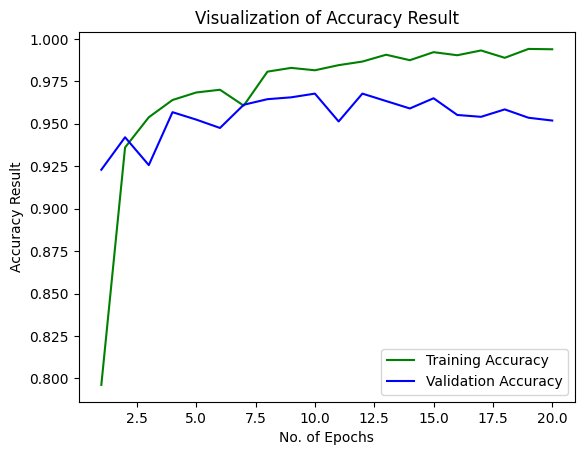

In [ ]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names
class_name

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy']

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1829 files belonging to 4 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step


(array([[9.0980738e-01, 5.2766792e-02, 1.6277162e-02, 2.1148648e-02],
        [3.6851130e-02, 9.1988653e-01, 3.7455291e-04, 4.2887732e-02],
        [2.1391745e-01, 6.0004395e-01, 1.1256091e-01, 7.3477671e-02],
        ...,
        [1.5058613e-09, 5.6672494e-08, 7.9090057e-07, 9.9999917e-01],
        [5.9670078e-09, 2.7816196e-07, 6.4243832e-06, 9.9999332e-01],
        [1.0839582e-04, 3.1509071e-03, 1.6565954e-03, 9.9508411e-01]],
       dtype=float32),
 (1829, 4))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(1829,), dtype=int64, numpy=array([0, 1, 1, ..., 3, 3, 3])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1829, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1829,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.94      0.99      0.96       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.94       477
                            Corn_(maize)___healthy       0.99      1.00      0.99       465

                                          accuracy                           0.95      1829
                                         macro avg       0.95      0.95      0.95      1829
                                      weighted avg       0.95      0.95      0.95      1829



In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[343,  27,  40,   0],
       [  1, 471,   0,   5],
       [ 12,   1, 463,   1],
       [  0,   1,   0, 464]])

In [ ]:
# Get class names (assuming you have them stored in class_name)
class_name = validation_set.class_names

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)


### Confusion Matrix Visualization

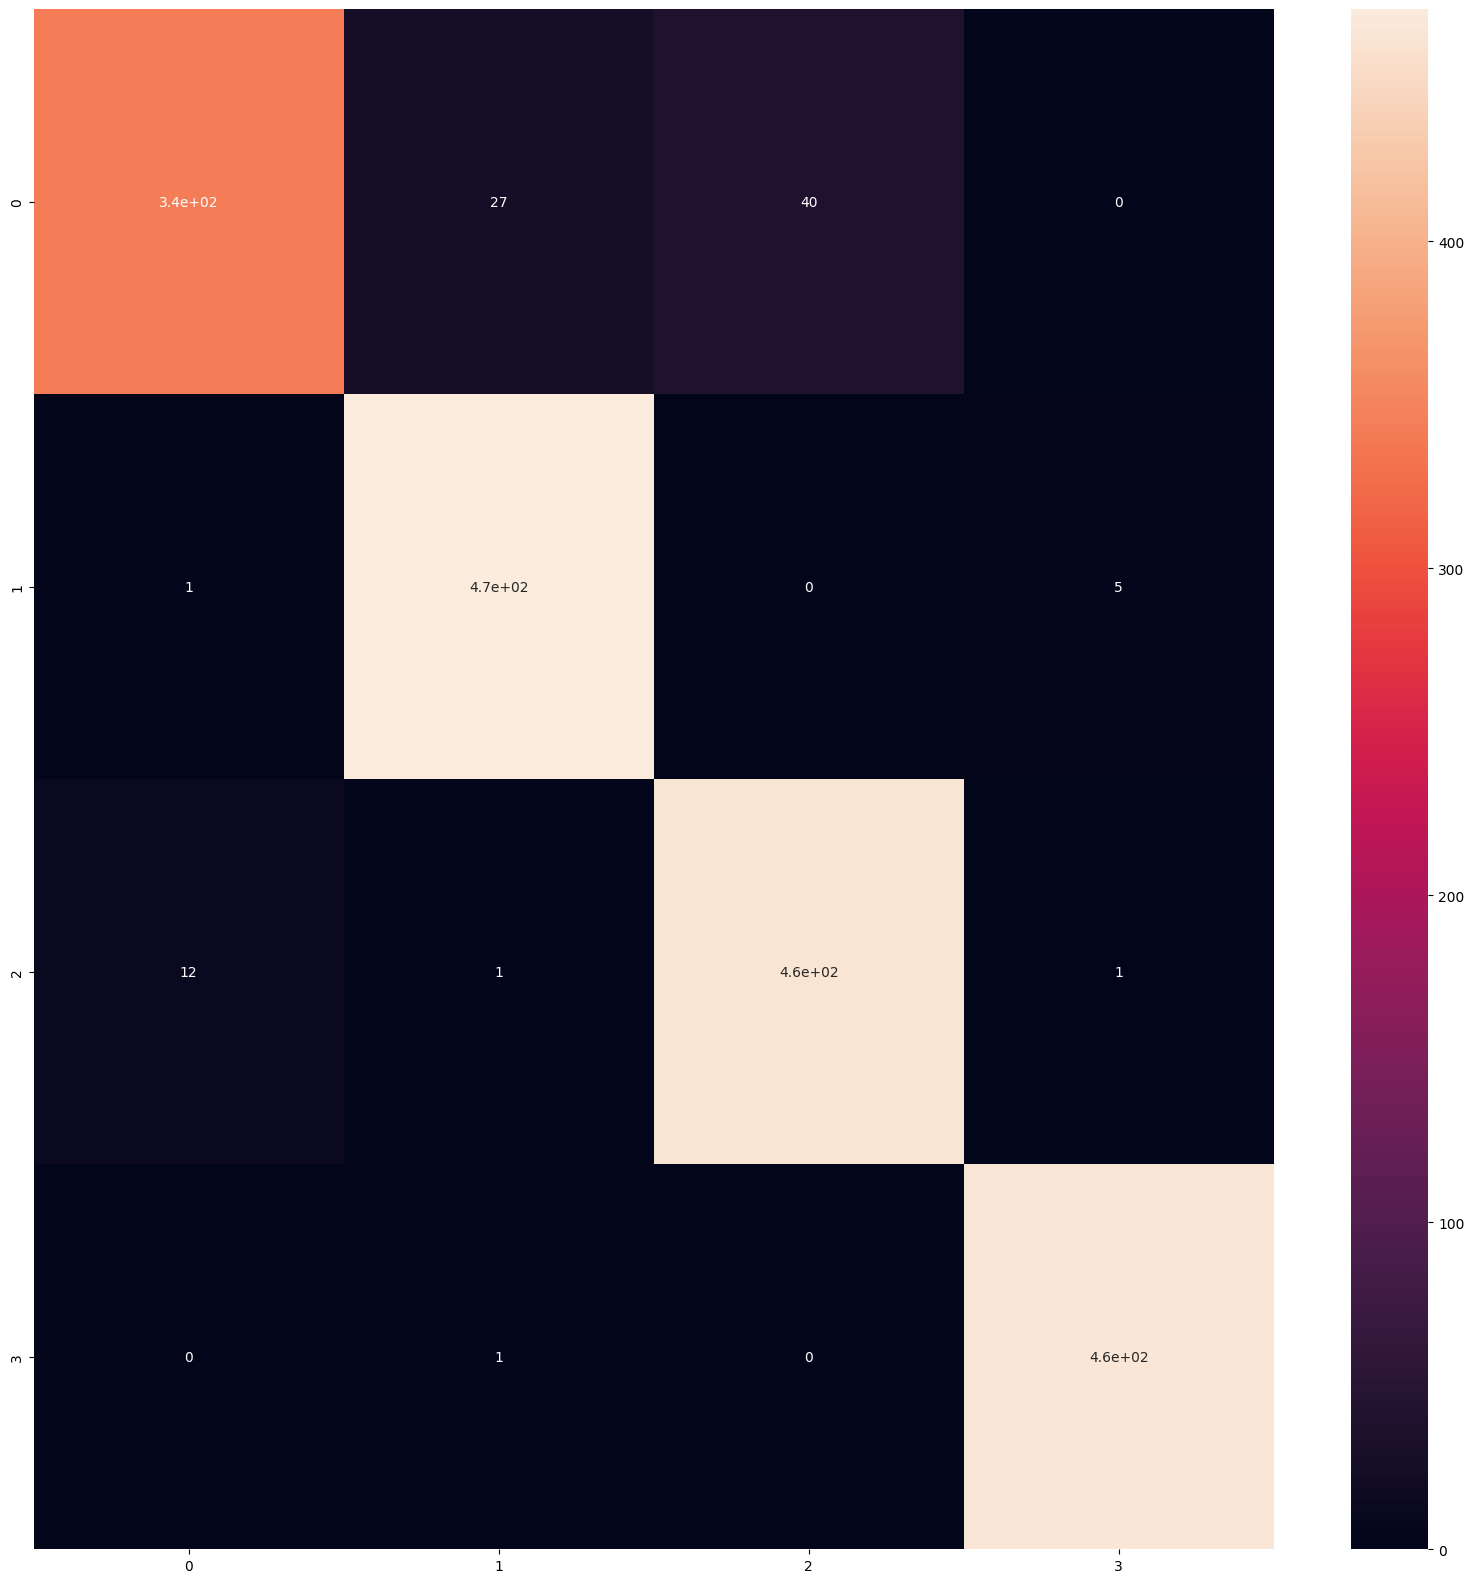

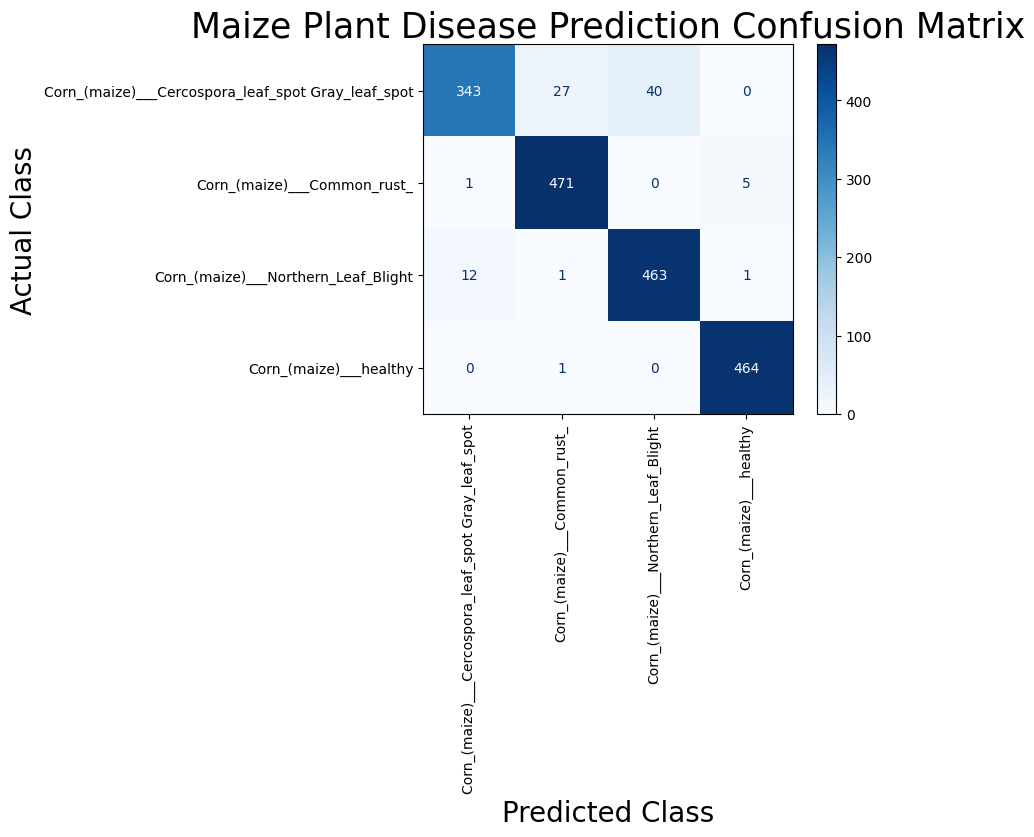

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, annot_kws={'size': 10})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  # Rotate x-axis labels vertically
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Maize Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()

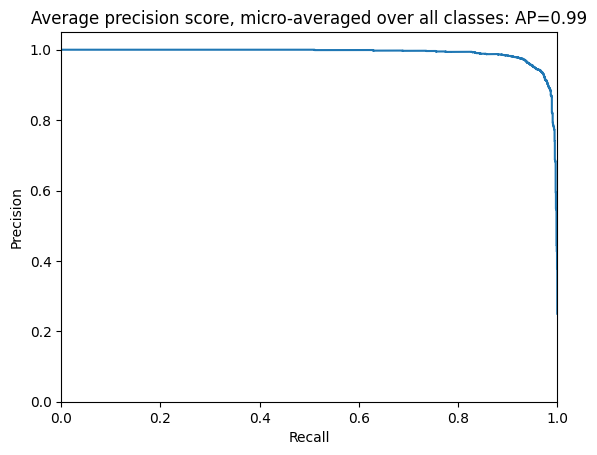

In [ ]:
!pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming you have:
# - y_true: True labels (one-hot encoded or categorical)
# - y_pred: Predicted probabilities (output of model.predict)
# - class_name: List of class names

# Binarize the true labels (if not already one-hot encoded)
y_true_bin = label_binarize(Y_true, classes=range(len(class_name)))

# Calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(class_name)):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], y_pred[:, i])

# Micro-average PR curve (average over all classes)
precision["micro"], recall["micro"], _ = precision_recall_curve(y_true_bin.ravel(), y_pred.ravel())
average_precision["micro"] = average_precision_score(y_true_bin, y_pred, average="micro")

# Plot the PR curve for the micro-average
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"])
)
plt.show()

# Plot PR curves for individual classes (optional)
# ... (similar to micro-average plotting) ...

In [ ]:
!pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Assuming you have:
# - y_true: True labels (one-hot encoded or categorical)
# - y_pred: Predicted probabilities (output of model.predict)
# - class_name: List of class names

# Binarize the true labels (if not already one-hot encoded)
y_true_bin = label_binarize(Y_true, classes=range(len(class_name)))

# Calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(class_name)):
    precision[i], recall[i], _ = precision_recall_curve(y_

SyntaxError: incomplete input (<ipython-input-47-17eaa05fd356>, line 21)